In [ ]:
# 결정 트리 분석, 트리 

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

(5197, 3) (1300, 3)
0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]
0.8572253223013276
0.8484615384615385


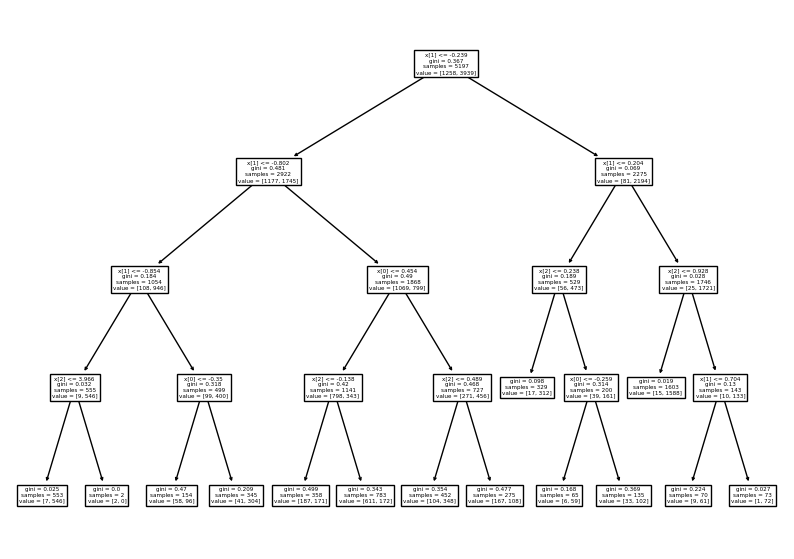

In [23]:


wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_impurity_decrease=0.0001, max_depth=4, random_state=42) # min_impurity_decrease 구분하려는 지니계수 최소량
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

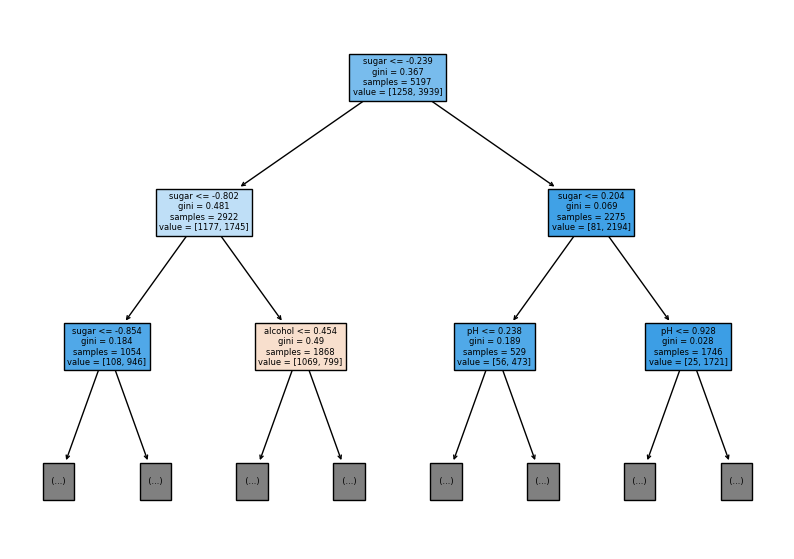

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 로드
data = load_iris()
X = data.data
y = data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 훈련 (지니 지수를 기준으로 분할)
tree_model = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=data.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
t = 7
c1 = 6
c2 = 1
gi = 1 - (c1/t)**2 - (c2/t)**2
gi

0.24489795918367355

In [ ]:
 # 엔트로피 계산 entropy 시스템 내 정보의 불확실성 정도
#결정 트리 알고리즘에서 엔트로피는 노드의 순도를 측정하는 데 사용됩니다. 엔트로피가 낮을수록 데이터가 더 순수하다는 것을 의미합니다.
# entropy = -sum((count / total_labels) * np.log2(count / total_labels) 
#                 for count in label_counts.values())
# 유의미하다 significant 의미있는 시그니피컨트

In [8]:
import numpy as np
def gini(tot_count : int, class_arr : list) -> float: 
    ret = 0
    if len(class_arr) == 0:
        return ret
    for i in class_arr:
        ret += (i/tot_count)**2
    return 1 - ret

 
def entropy(tot_count : int, class_arr : list) -> float: 
    pass

print('말', gini(7, [6,1]))
print('주사위', gini(6, [1,1,1,1,1,1]))
print('윷놀이', gini(16, [1,4,6,4,1]))

# entropy = -sum((count / total_labels) * np.log2(count / total_labels) 
#               for count in label_counts.values())

말 0.24489795918367352
주사위 0.8333333333333333
윷놀이 0.7265625


In [11]:
import numpy as np
from collections import Counter

def entropy(labels):
    """
    Calculate the entropy of a label distribution.
    
    Parameters:
    labels (list): A list of class labels.
    
    Returns:
    float: The entropy of the label distribution.
    """
    # 클래스 레이블의 빈도수 계산
    label_counts = Counter(labels)
    total_labels = len(labels)
    
    # 엔트로피 계산
    entropy = -sum((count / total_labels) * np.log2(count / total_labels) 
                   for count in label_counts.values())
    
    return entropy

# 예제 데이터
labels = ['가젤','가젤','가젤', '사자', '코뿔소', '타조','타조','타조']
labels1 = ['말', '말', '말', '말', '돼지', '말', '말']
labels2 = ['1', '2', '3', '4', '5','6']
labels3 = ['도','도','도','도', '개','개','개','개','개','개', '걸','걸','걸','걸', '윷', '모']

# 엔트로피 계산
entropy_value = entropy(labels)
print("타조:", entropy_value)
print("말:", entropy(labels1))
print("주사위:", entropy(labels2))
print("윷놀이:", entropy(labels3))


타조: 1.811278124459133
말: 0.5916727785823275
주사위: 2.584962500721156
윷놀이: 2.0306390622295662


In [3]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

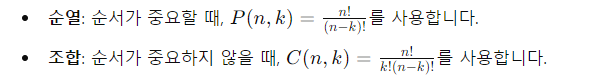

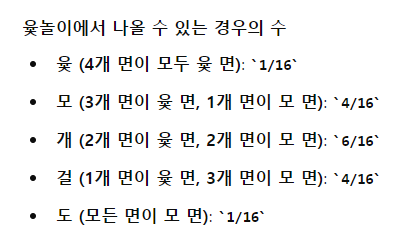